In [1]:
import pandas as pd

In [2]:
data=pd.read_csv(r"C:\Users\samir\Downloads\titanic.csv")

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# Pclass
# Sex
# Age
# Fare

In [5]:
features=data[['Pclass','Sex','Age','Fare']]

In [6]:
target=data[['Survived']]

In [7]:
features.isnull().sum()

Pclass      0
Sex         0
Age       177
Fare        0
dtype: int64

In [8]:
features['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [9]:
features['Age']=features['Age'].fillna(features['Age'].mean())

C:\Users\samir\AppData\Local\Temp\ipykernel_5428\2282966729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Age']=features['Age'].fillna(features['Age'].mean())


In [10]:
features.isnull().sum()

Pclass    0
Sex       0
Age       0
Fare      0
dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
convert_sex=LabelEncoder()


In [14]:
features['Sex']=convert_sex.fit_transform(features['Sex'])

C:\Users\samir\AppData\Local\Temp\ipykernel_5428\3301721841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Sex']=convert_sex.fit_transform(features['Sex'])


In [15]:
features['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32

In [16]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(features[["Age"]])
features["Age"] = scaler.transform(features[["Age"]])

scaler.fit(features[["Fare"]])
features["Fare"] = scaler.transform(features[["Fare"]])

C:\Users\samir\AppData\Local\Temp\ipykernel_5428\4094485099.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["Age"] = scaler.transform(features[["Age"]])
C:\Users\samir\AppData\Local\Temp\ipykernel_5428\4094485099.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["Fare"] = scaler.transform(features[["Fare"]])


In [17]:
X_train, X_test, y_train, y_test = train_test_split(features,target['Survived'],test_size=0.3)

In [18]:
from sklearn import tree

In [19]:
model=tree.DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [20]:
model.score(X_test,y_test)

0.7761194029850746

In [21]:
y_predict=model.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
cm=confusion_matrix(y_test,y_predict)

In [24]:
import seaborn as sns

<Axes: >

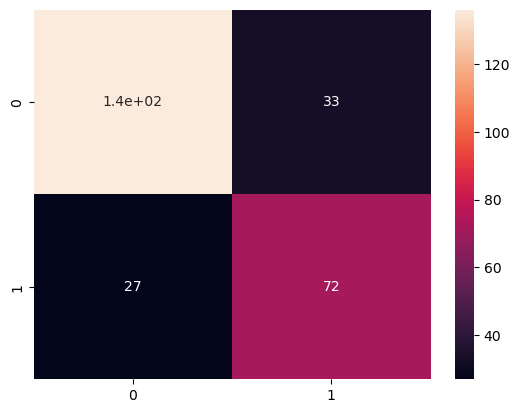

In [25]:
sns.heatmap(cm,annot=True)

In [26]:
features

,Pclass,Sex,Age,Fare
0,3,1,0.271174,0.014151
1,1,0,0.472229,0.139136
2,3,0,0.321438,0.015469
3,1,0,0.434531,0.103644
4,3,1,0.434531,0.015713
...,...,...,...,...
886,2,1,0.334004,0.025374
887,1,0,0.233476,0.058556
888,3,0,0.367921,0.045771
889,1,1,0.321438,0.058556


In [27]:
model.predict([[3,1,22,7.25]])

C:\Users\samir\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [28]:
target

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [29]:
text_rep=tree.export_text(model)

In [30]:
# print(text_rep)

In [31]:
features

,Pclass,Sex,Age,Fare
0,3,1,0.271174,0.014151
1,1,0,0.472229,0.139136
2,3,0,0.321438,0.015469
3,1,0,0.434531,0.103644
4,3,1,0.434531,0.015713
...,...,...,...,...
886,2,1,0.334004,0.025374
887,1,0,0.233476,0.058556
888,3,0,0.367921,0.045771
889,1,1,0.321438,0.058556


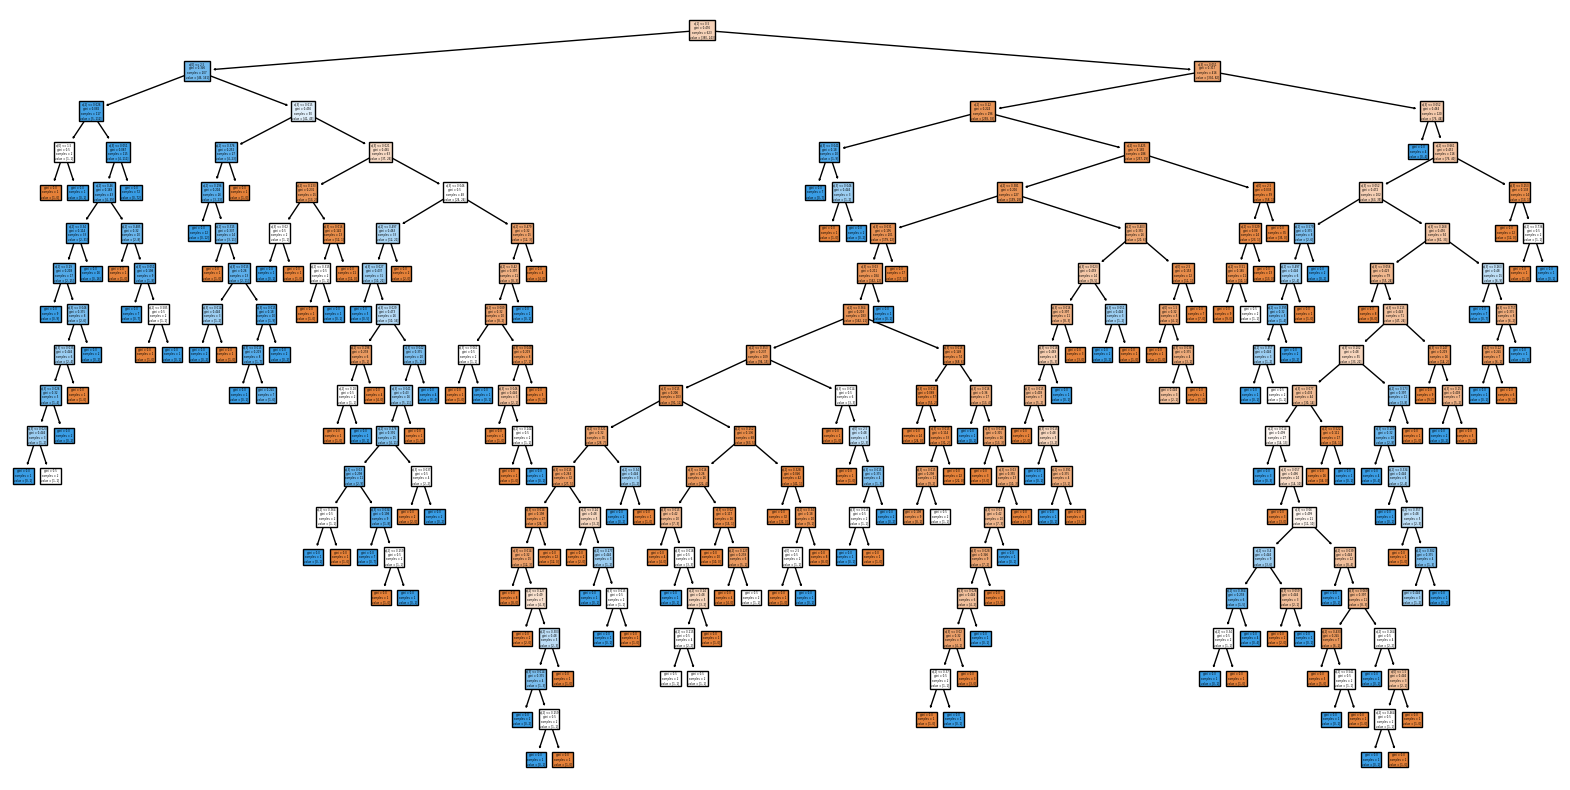

In [32]:
import matplotlib.pyplot as plt
from sklearn import tree

# Assuming 'model' is your trained decision tree model
# Assuming 'features' is a list of feature names
plt.figure(figsize=(20,10))
tree.plot_tree(model, filled=True)
# tree.plot_tree(model, feature_names=[features['Pclass'],convert_sex,features['Age'],features['Fare']], filled=True)
# plt.sa()
# plt.savefig('plt.png')
plt.savefig('myimage.svg', format='svg', dpi=1200)


In [ ]:
# tree.plot_tree(model,feature_names=[features['Pclass'],convert_sex,features['Age'],features['Fare']])

In [3]:
!cd



C:\Users\samir\Data Visualization
